# Resolution Matcher: A Self-Simplifying Program for Fire Perimeters

- Topic: Wildfire Perimeter mapping; satellite versus aircraft instrument observations
- Goals:
    - Of interest to wildfire researchers is to find a way to quantify how much “simpler” satellite fire perimeter estimates are from aircraft observations
    - While it could be possible to just take the resolution of the two products, intricacies such as swath angle, tilt, and varying topography impact the resolution of each product
    - Ultimate goal: produce a program that given a “truth” polygon and “estimate” polygon, recursively optimizes the “estimate” polygon to be the closest match to the “truth”. Outside of typical shape algorithms, apply extra factors such as topography, fuel type, etc to influence the final shape
    - Topography, fuel type, and average weather behavior have an extreme influence on fire behavior; being able to lay over datasets and possibly predict corrections could help adjust future satellite products
    
- Considerations/challeneges:
    - Date matching
    - Satellite has no name sorting officially in the API
    - Cannot always assume its aircraft method
    - NIFC / fire management database is imperfect in labeling/geometry sorting


## About the Data

- NASA FEDS Archived
- NIFC Archived 

## About the files
- `main.ipynb`: this is the key file that demonstrates the project workflow
- `api_access.py`: all functions managing api access 
- `calculations.py`: all functions for polygon calculations
- `best_simplify.py`: simplification algorithm which uses feedback from calculations to identify performance

In [1]:
import sys
import os

from satellite import SatelliteDetection
from aircraft import AircraftDetection

from search_iterator import *
from Utilities import *

In [2]:
# call smart iterator with set inputs 

year_start = 2019
month_start = 10
day_start = 1

year_end = 2019
month_end = 12
day_end = 20

# 48.642283, -125.006740
# 26.522897, -77.225943


bbox = ["-125.0", "24.396308", "-66.93457", "49.384358"] # ["-122.887312", "38.560242", "-122.601345", "38.813395"] # ["-125.006740", "26.522897", "-77.225943", "48.642283"] # ["-123.894958","39.529218","-122.290878","40.634026"] # e.g. california
crs = 3857 # 4326 # recommended 

# start search
master_matches, all_aircraft_polygons, all_satellite_polygons = init_search(year_start, 
                                                                            month_start,
                                                                            day_start, 
                                                                            year_end, 
                                                                            month_end,
                                                                            day_end, 
                                                                            bbox,
                                                                            crs)

You may see an ERROR 1 occur; ignore this unless block throws actual exception...
You may see WARNING:fiona.ogrext:Expecting property name enclosed in double quotes: line 1 column 2 (char 1); you can ignore this error safely
DEBUG in __fetch_api_collection: extent / meta data: {'spatial': {'bbox': [[-125.01170994228654, 31.67479552365894, -100.99882037044597, 49.5160148262177]], 'crs': 'http://www.opengis.net/def/crs/OGC/1.3/CRS84'}, 'temporal': {'interval': [['2018-01-02T12:00:00+00:00', '2021-12-31T12:00:00+00:00']], 'trs': 'http://www.opengis.net/def/uom/ISO-8601/0/Gregorian'}}


ERROR 1: PROJ: proj_create_from_database: Open of /projects/env-feds/share/proj failed
ERROR:fiona._env:fread(635) failed on DBF file.
ERROR:root:FAILED: No matching dates found even with provided day search range window: 7, critical benchmarking failure.
ERROR:root:FAILED: No matching dates found even with provided day search range window: 7, critical benchmarking failure.


## Printing and Plotting Sample results

Listed `master_matches` which represent indices for the following sets:
- all_aircraft_polygons
- all_satellite_polygons

In [3]:
print(all_aircraft_polygons.crs)
print(all_satellite_polygons.crs)
print(len(all_aircraft_polygons))

print(all_satellite_polygons)

epsg:3857
epsg:3857
567
                                               geometry  duration       farea  \
3702  POLYGON ((-102.787 47.477, -102.787 47.477, -1...      40.0   20.665967   
1807  POLYGON ((-104.153 31.757, -104.153 31.757, -1...      42.0    6.178737   
4848  POLYGON ((-115.739 43.179, -115.739 43.179, -1...      27.0    4.424931   
1012  MULTIPOLYGON (((-103.582 32.349, -103.582 32.3...      26.0    8.938823   
1001  POLYGON ((-104.474 32.608, -104.474 32.608, -1...      44.0    5.439254   
...                                                 ...       ...         ...   
3928  MULTIPOLYGON (((-102.750 48.054, -102.750 48.0...     198.0  168.290793   
124   MULTIPOLYGON (((-102.132 32.366, -102.132 32.3...     121.0   12.918486   
786   POLYGON ((-103.324 31.870, -103.322 31.855, -1...      59.5    5.976418   
1184  MULTIPOLYGON (((-104.033 32.165, -104.033 32.1...      72.0    7.935179   
8510  POLYGON ((-112.238 36.371, -112.238 36.371, -1...      61.5   74.088689   

   

In [6]:
# show resulting matches via index
print(master_matches)

# sync indices accordin to cols 
sync_indicies = []
for val_set in master_matches:
    index_extract = all_satellite_polygons.iloc[val_set[0][0]]['index']
    sync_indicies.append(index_extract)
    
print(sync_indicies)

[[(0, None)], [(1, None)], [(2, None)], [(3, None)], [(4, None)], [(5, None)], [(6, None)], [(7, None)], [(8, None)], [(9, None)], [(10, None)], [(11, None)], [(12, None)], [(13, None)], [(14, None)], [(15, None)], [(16, None)], [(17, None)], [(18, None)], [(19, None)], [(20, None)], [(21, None)], [(22, None)], [(23, None)], [(24, None)], [(25, None)], [(26, None)], [(27, None)], [(28, None)], [(29, None)], [(30, None)], [(31, None)], [(32, None)], [(33, None)], [(34, None)], [(35, None)], [(36, None)], [(37, None)], [(38, None)], [(39, None)], [(40, None)], [(41, None)], [(42, None)], [(43, None)], [(44, None)], [(45, None)], [(46, None)], [(47, None)], [(48, None)], [(49, None)], [(50, None)], [(51, None)], [(52, None)], [(53, 11426)], [(54, None)], [(55, None)], [(56, None)], [(57, None)], [(58, None)], [(59, None)], [(60, None)], [(61, None)], [(62, None)], [(63, None)], [(64, None)], [(65, None)], [(66, None)], [(67, None)], [(68, None)], [(69, None)], [(70, None)], [(71, None)], 

In [8]:
# iterate and capture only tuples best matching
non_nones = []
corresponding_indices = []

for val_set in master_matches:
    get_tuple = val_set[0]
    check = get_tuple[1]
    if check is None:
        continue
    else:
        index_extract = all_satellite_polygons.iloc[val_set[0][0]]['index']
        corresponding_indices.append(index_extract)
        non_nones.append(get_tuple)
        
print(non_nones)
print(corresponding_indices)

[(53, 11426), (115, 11287), (137, 11374), (144, 11449)]
[8113, 7808, 7716, 7962]


## Plot Entire Datasets against each other

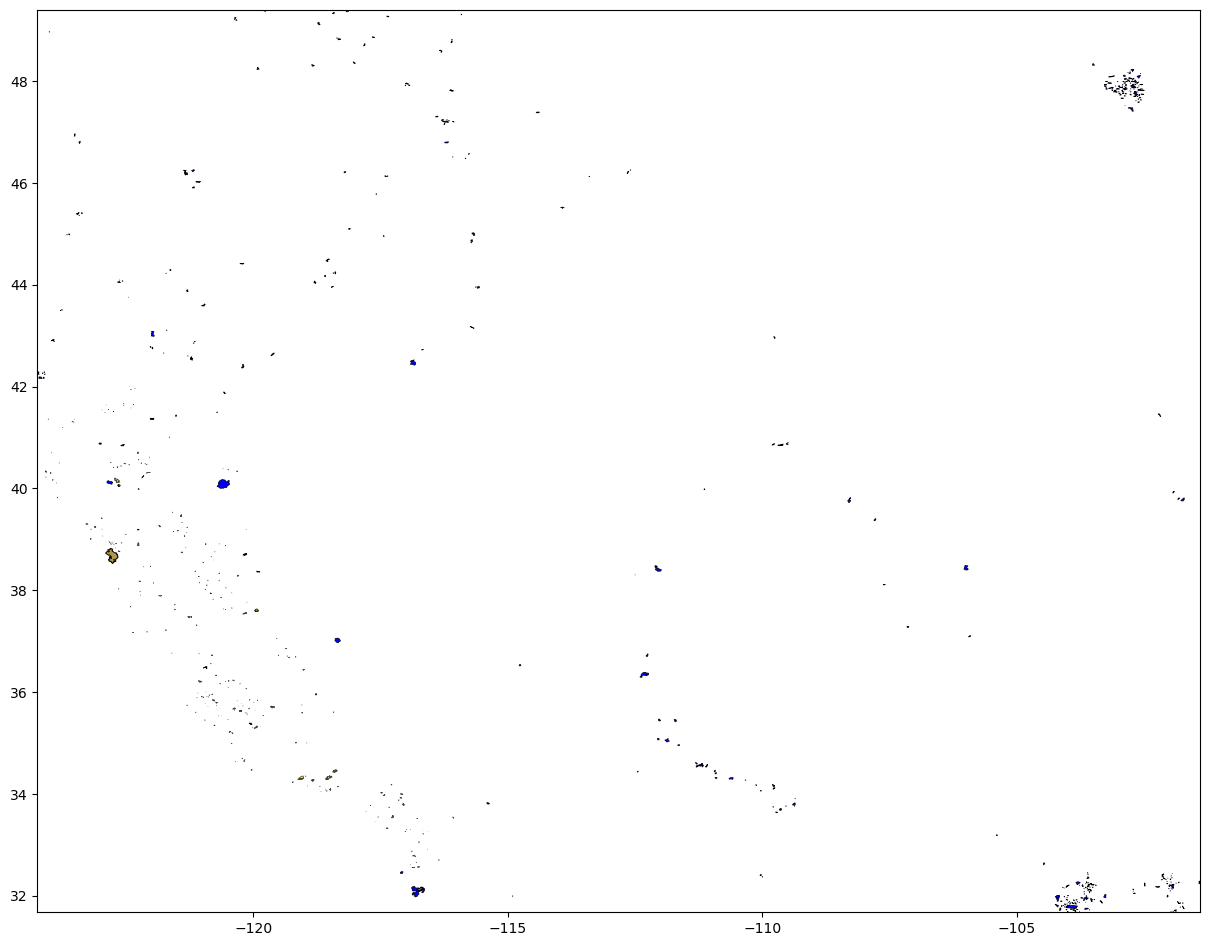

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))

all_satellite_polygons.plot(ax=ax, legend=True, label="SATELLITE MATCH", color="blue",edgecolor="black", linewidth=0.5 )
all_aircraft_polygons.plot(ax=ax, legend=True, label="CALFIRE MATCH", color="gold", edgecolor="black", linewidth=0.5, alpha=0.7)

xmin, ymin, xmax, ymax = all_satellite_polygons.geometry.total_bounds

# Set axis limits to zoom into the bounding box of 'sat_fire'
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.show()

## Plot explicit matches by indexes

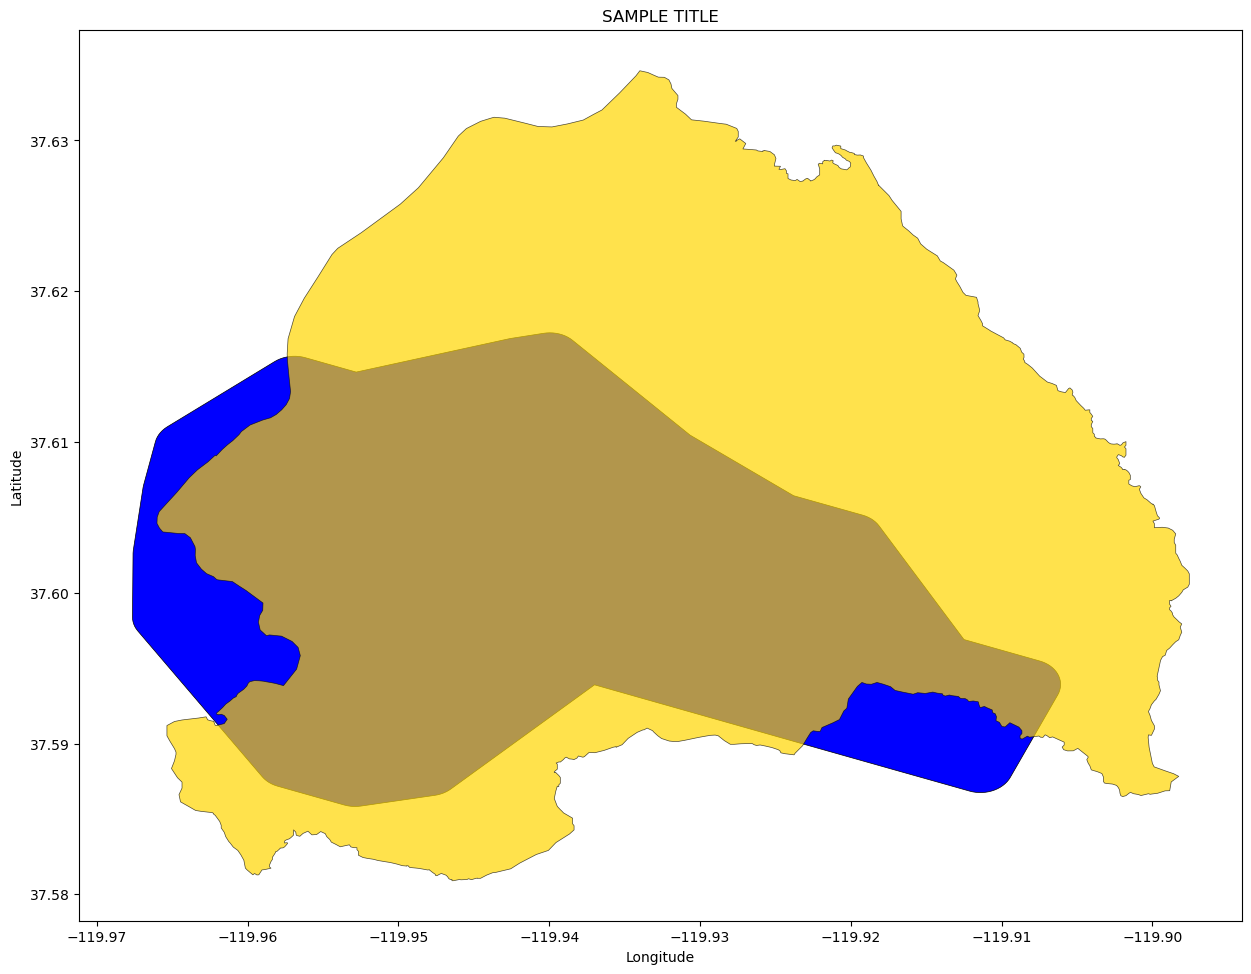

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))

sat_fire = all_satellite_polygons[all_satellite_polygons['index'] == 8113] 
aircraft_fire = all_aircraft_polygons[all_aircraft_polygons['index'] == 11426]

v = sat_fire.plot(ax=ax, legend=True, label="SATELLITE MATCH", color="blue",edgecolor="black", linewidth=0.5 )
n = aircraft_fire.plot(ax=ax, legend=True, label="AIRCRAFT MATCH", color="gold", edgecolor="black", linewidth=0.5, alpha=0.7)
# n = all_aircraft_polygons.plot(ax=ax, legend=True, label="CALFIRE MATCH", color="gold", edgecolor="black", linewidth=0.5, alpha=0.7)


ax.set_title("SAMPLE TITLE")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

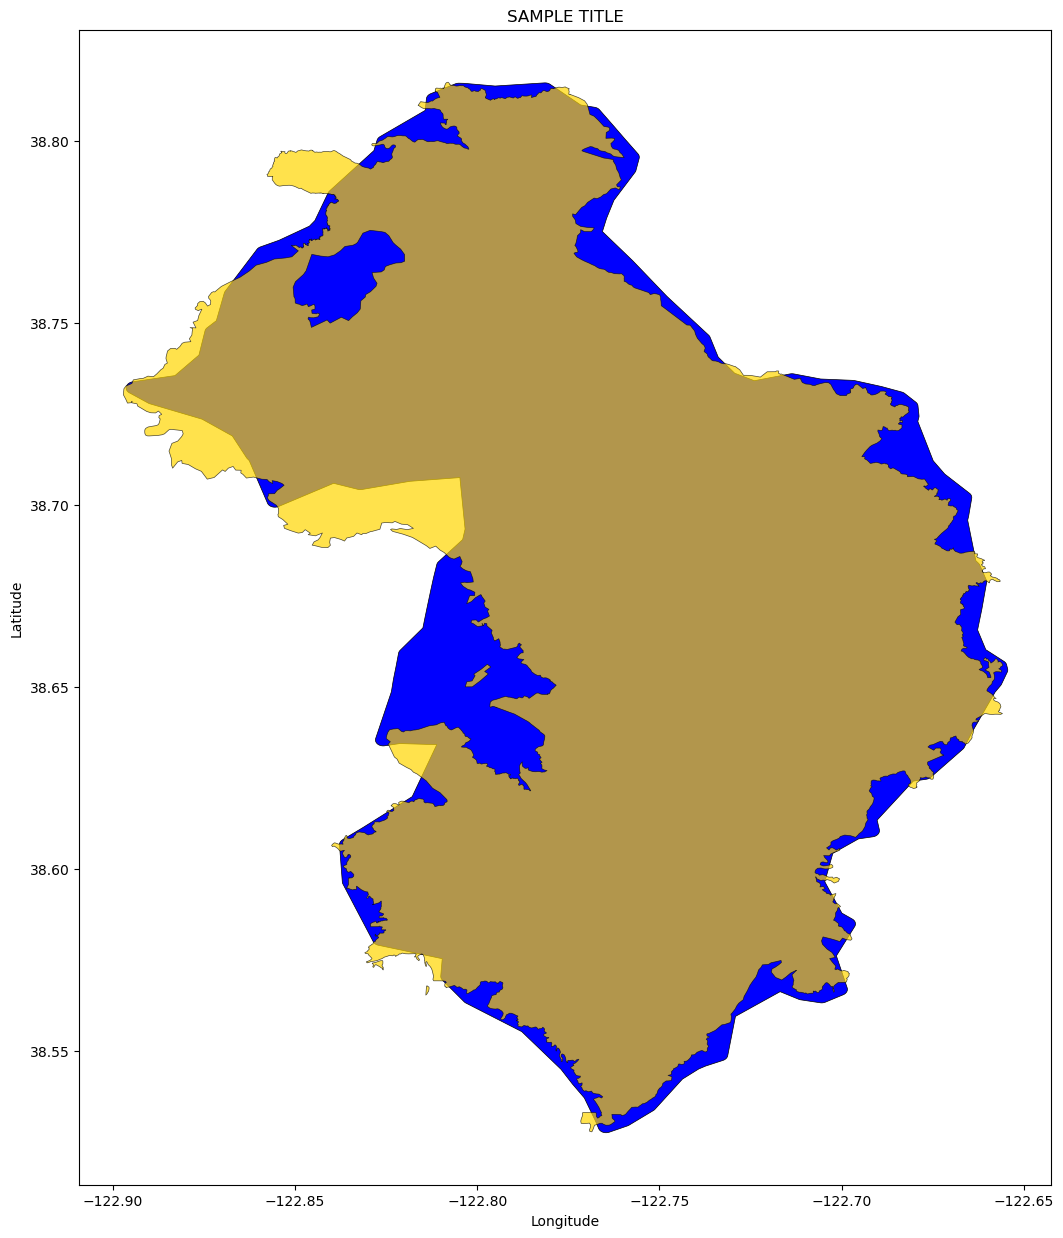

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))

sat_fire = all_satellite_polygons[all_satellite_polygons['index'] == 7808] 
aircraft_fire = all_aircraft_polygons[all_aircraft_polygons['index'] == 11287]

v = sat_fire.plot(ax=ax, legend=True, label="SATELLITE MATCH", color="blue",edgecolor="black", linewidth=0.5 )
n = aircraft_fire.plot(ax=ax, legend=True, label="AIRCRAFT MATCH", color="gold", edgecolor="black", linewidth=0.5, alpha=0.7)
# n = all_aircraft_polygons.plot(ax=ax, legend=True, label="CALFIRE MATCH", color="gold", edgecolor="black", linewidth=0.5, alpha=0.7)


ax.set_title("SAMPLE TITLE")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

xmin, ymin, xmax, ymax = sat_fire.geometry.total_bounds

# Set axis limits to zoom into the bounding box of 'sat_fire'
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)

plt.show()

# OLD

# Part 3: Simplification per fire; find best match

For every pair of fires, run best-simplification algorithm.
Basic plan; keep simplifying and track previous results for two generations. As soon as results degrade two times in a row, go back two times and declare the best version

In [8]:
#TODO

# Part 4: With best simplification, track raster data for fire

Selected datasets to track (static). Reasoning per each set is based on the rothermel model
- Top count of 40 fuel models / median (? best datascience approach?) https://gacc.nifc.gov/oncc/docs/40-Standard%20Fire%20Behavior%20Fuel%20Models.pdf 
- Average/median slope
- Fuel loading model LANDFIRE: https://www.landfire.gov/flm.php
- More advanced (likely too far; forecast of the day -> use wind, temperature, and relative humidity)

In [9]:
# TODO

# Part 5: Calculate potential correlations/output plots 

In [10]:
# TODO

# Part 6: Conclusion 